In [1]:
from predict import predict_on_test
from src.data_generator_seq2seq import DataGenerator


Using TensorFlow backend.


In [2]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.misc import toimage
import os
import yaml
from nltk.metrics.distance import edit_distance

In [3]:
#predicts on the testing set
print('Predicting on test set')
CER, WER, labels_test, pred_test, images_test, dat = predict_on_test('src/config.yml')


Predicting on test set
['\t', '\n', '\x0b', '\x0c', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']
100
Instructions for updating:
Colocations handled automatically by placer.
which which
30 3
, ,
, ,
American Amerca
the the
- -
In In
screws strews
not not
England England
at at
going going
. -
cult oul
Brown Brown
the the
at at
, ,
selfish Seltish
application asplication
off off
. .
plain-clothes plain-clothes
examination examication
was was
the the
roads roads
as as
The The
can't caut
did did
enter enter
down Down
recent recent
ever ever
was was
envisages emi

In [4]:
#loads the configure file so we can call certain specifics in our next cells
with open('src/config.yml') as f:
    config = yaml.load(f)

In [5]:
#need to user data generator to generate data
test_generator = DataGenerator(config, dat, shuffle=False, use_data_augmentation=False)

['\t', '\n', '\x0b', '\x0c', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']
100


In [52]:
for idx,i in enumerate(dat):
    if dat[idx]['label']=='THE':
        print(idx, i)

322 {'filename': 'g07/g07-007a/g07-007a-04-03.png', 'label': 'THE'}
2771 {'filename': 'g01/g01-022/g01-022-03-04.png', 'label': 'THE'}
6071 {'filename': 'b01/b01-118/b01-118-03-04.png', 'label': 'THE'}
7662 {'filename': 'a01/a01-007u/a01-007u-05-03.png', 'label': 'THE'}


In [58]:
#pick and index to view the image, actual label and predicted label in the next cell (0 - 11531)
index = 8797
bad_lst = [8797,3956,10294 ,11198, 1020,2962]

good_lst = [9401, 11290, 2116, 6942, 10050]
the_lst = [5, 5546, 129, 2771]


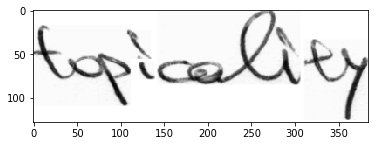

           Actual label:  topicality
           Predicted Label:  tyricality


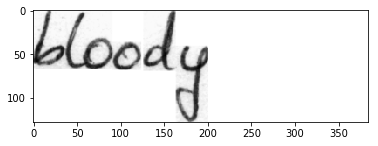

           Actual label:  bloody
           Predicted Label:  Lloddy


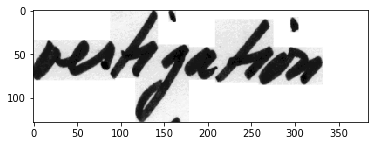

           Actual label:  vestigation
           Predicted Label:  rejegition


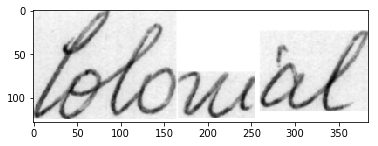

           Actual label:  Colonial
           Predicted Label:  lounical


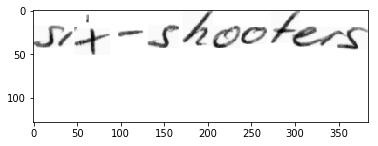

           Actual label:  six-shooters
           Predicted Label:  stronst-olokers


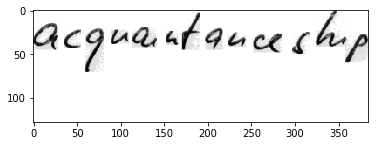

           Actual label:  acquaintanceship
           Predicted Label:  agentuchater's


<Figure size 432x288 with 0 Axes>

In [64]:
for i in bad_lst:
    plt.imshow(np.reshape(images_test[i, :, :,:], (test_generator.y_size, test_generator.x_size)), cmap=plt.get_cmap('gray'))
    plt.show()
    print("           Actual label: ", labels_test[i])
    print("           Predicted Label: ", pred_test[i])
    plt.savefig(f'{i}-{labels_test[i]}.png')

In [65]:
#examining distance metrics in more depth
words_identified = 0
characters_identified = 0
char_tot = 0
dist = []
n_dist= []

for i in range(len(pred_test)):
    if labels_test[i] == pred_test[i]:
        words_identified += 1

    levenshtein_distance = edit_distance(labels_test[i], pred_test[i])
    dist.append(levenshtein_distance)
    n_char = np.maximum(len(labels_test[i]), len(pred_test[i]))

    normalized_distance = levenshtein_distance/n_char
    n_dist.append(normalized_distance)
    characters_identified += normalized_distance


(array([8.415e+03, 1.267e+03, 0.000e+00, 7.520e+02, 4.680e+02, 0.000e+00,
        2.510e+02, 1.570e+02, 0.000e+00, 9.200e+01, 4.000e+01, 0.000e+00,
        3.300e+01, 1.500e+01, 0.000e+00, 1.000e+01, 8.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00]),
 array([ 0.  ,  0.65,  1.3 ,  1.95,  2.6 ,  3.25,  3.9 ,  4.55,  5.2 ,
         5.85,  6.5 ,  7.15,  7.8 ,  8.45,  9.1 ,  9.75, 10.4 , 11.05,
        11.7 , 12.35, 13.  ]),
 <a list of 20 Patch objects>)

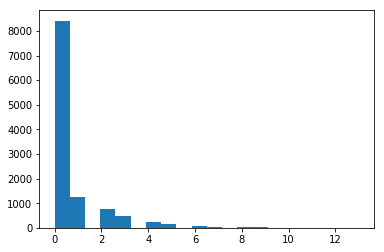

In [66]:
# histogram of unnormalized edit distance metric
plt.hist(dist, bins = 20)

(array([8.415e+03, 2.000e+01, 2.860e+02, 1.480e+02, 2.670e+02, 4.240e+02,
        2.720e+02, 7.200e+01, 2.570e+02, 2.100e+01, 3.680e+02, 1.510e+02,
        3.200e+01, 1.220e+02, 2.700e+01, 7.900e+01, 4.900e+01, 1.700e+01,
        6.000e+00, 4.790e+02]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

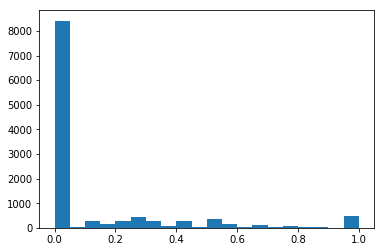

In [67]:
#histogram of the normalized distances
plt.hist(n_dist, bins=20)

In [68]:
#prints the number of words in the testing set that had no errors
count = 0
for i in dist:
    if i ==0:
        count += 1
print(count)

8415


In [71]:
1-(count/len(dat)) #double checking the word error rate with the counts

0.26902362751911046

In [72]:
import pandas as pd

In [73]:
df = pd.DataFrame(dist)

In [74]:
df[0].value_counts()

0     8415
1     1267
2      752
3      468
4      251
5      157
6       92
7       40
8       33
9       15
10      10
11       8
12       3
13       1
Name: 0, dtype: int64

In [75]:
#create counts as a dataframe
df_sub = df[0].value_counts().reset_index() 

In [76]:
df_sub

,index,0
0,0,8415
1,1,1267
2,2,752
3,3,468
4,4,251
5,5,157
6,6,92
7,7,40
8,8,33
9,9,15


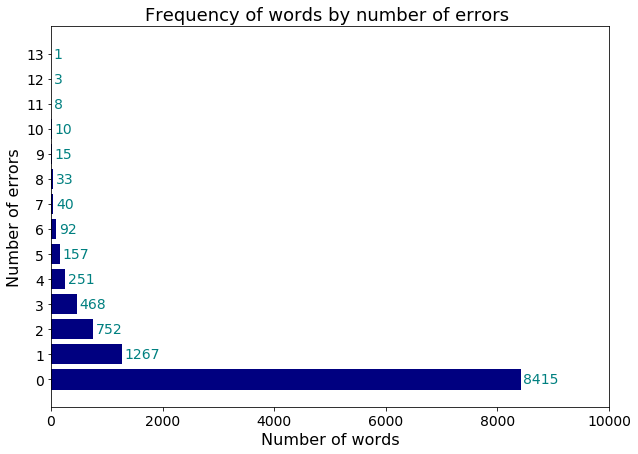

In [77]:
plt.figure(figsize=(10,7))
plt.barh(df_sub['index'], df_sub[0], color = 'navy')
width = 0.75 # the width of the bars 
ind = df_sub['index']
plt.xlabel('Number of words', fontsize = 16)
plt.ylabel('Number of errors', fontsize = 16)
plt.yticks(ind, fontsize = 14)
plt.xticks(fontsize = 14)
# plt.set_yticklabels(x, minor=False)
for i, v in zip(ind, df_sub[0]):
    plt.text(v+50, i, str(v), color='teal', va='center', fontsize = 14)
plt.xlim(0, 10000)
plt.title("Frequency of words by number of errors ", fontsize = 18)
plt.savefig("wordsbyerror_202.png")

In [78]:
WER

0.2690236275191105

In [79]:
# number of characters to iterate over
lst = ['\t', '\n', '\x0b', '\x0c', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']

In [80]:
d_true = dict((key, 0) for key in lst)

In [81]:
d_error = dict((key, 0) for key in lst)

In [82]:
for true, pred in zip(labels_test, pred_test):
    for i, j in zip(true, pred):
        if i == j:
            d_true[i] += 1
        else:
            d_error[i] += 1
    

In [83]:
df_error = pd.DataFrame(list(d_error.items()), columns = ['char', 'num'])


In [84]:
df_true = pd.DataFrame(list(d_true.items()), columns = ['char', 'num'])

In [85]:
ids = []
for idx, (true, error) in enumerate(zip(df_true['num'], df_error['num'])):
    if true == 0 and error == 0:
        ids.append(idx)

In [86]:
df_error = df_error.drop(ids, axis = 0).reset_index(drop=True)
df_true = df_true.drop(ids, axis = 0).reset_index(drop=True)

In [87]:
df_new = df_true.copy()

In [105]:
df_new['errornum'] = df_error['num']
df_new['fraction'] = df_new['errornum']/(df_new['errornum'] + df_new['num'])
df_new['total'] = (df_new['errornum'] + df_new['num'])
str_fract = str('{}/{}').format(df_new['errornum'], df_new['total'])
df_new['fract'] = 100

In [106]:
df_new.sort_values('fraction', inplace = True, ascending = False)

In [112]:
fra = [f'{i} / {j}' for i, j in zip(df_new['errornum'], df_new['total'])]


In [90]:
lst = df_new['char']

In [91]:
totals = [i+j for i, j in zip(df_new['num'], df_new['errornum'])]
errorBars = [i / j * 100 for i, j in zip(df_new['errornum'], totals)]
trueBars = [i / j * 100 for i, j in zip(df_new['num'], totals)]

''

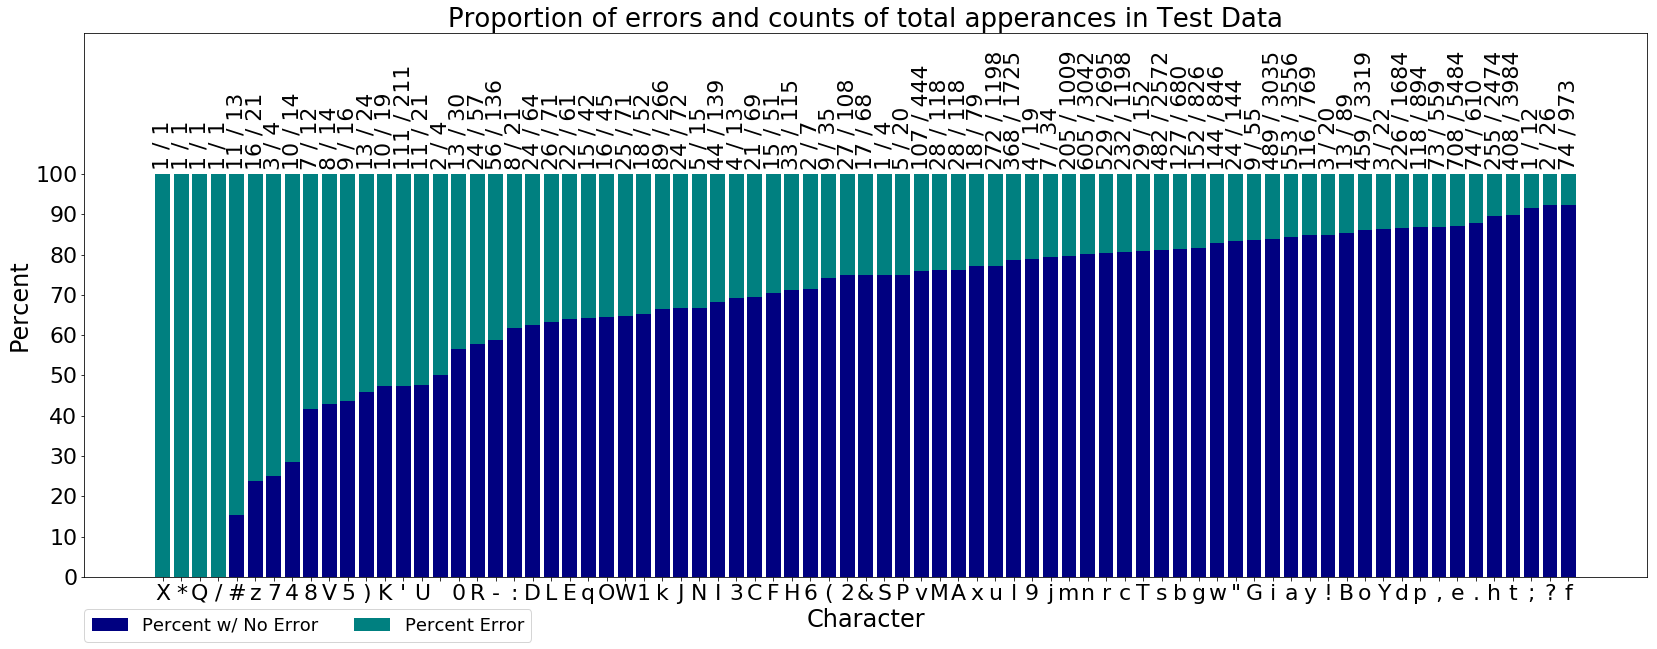

In [115]:
N = len(df_new)
ind = np.arange(N)
w = 0.8
plt.figure(figsize=(28,10))
plt.bar(ind, trueBars, width = w, color = 'navy', label = 'Percent w/ No Error')
plt.bar(ind, errorBars, width = w, color = 'teal', bottom = trueBars, label = "Percent Error")
plt.ylabel('Percent', fontsize = 24)
plt.xlabel('Character', fontsize = 24)
plt.xticks(ind, lst, fontsize=22)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 22)
plt.legend(bbox_to_anchor=(0, -0.06, 1, 0), loc=2, ncol=2, borderaxespad=0,fontsize = 18)
for h, (i, v) in zip(df_new['fract'], zip(ind, fra)):
    plt.text(i, h + 1, str(v), color='black', fontsize = 22, rotation = 90, va='bottom', ha = 'center')
plt.ylim(0, 135)
plt.title('Proportion of errors and counts of total apperances in Test Data', fontsize = 26)
plt.savefig('error_rates_202.png')
;

In [117]:
import json
with open(config['labels_file']) as f:
    dataset = json.load(f)
print(dataset.keys())

FileNotFoundError: [Errno 2] No such file or directory: 'data/labels.json'

In [116]:
targets = []
train = []
test = []
val = []
for i in dataset['test']:
    targets.append([i['label'], i['filename'], len(i['label'])])
    test.append([i['label'], i['filename'], len(i['label'])])
for i in dataset['train']:
    targets.append([i['label'], i['filename'], len(i['label'])])
    train.append([i['label'], i['filename'], len(i['label'])])
for i in dataset['val']:
    targets.append([i['label'], i['filename'], len(i['label'])])
    val.append([i['label'], i['filename'], len(i['label'])])



NameError: name 'dataset' is not defined

In [363]:
df_targ = pd.DataFrame(targets, columns = ['labels','file', 'len'])

In [364]:
df_targ.sort_values('len', ascending=True, inplace = True)

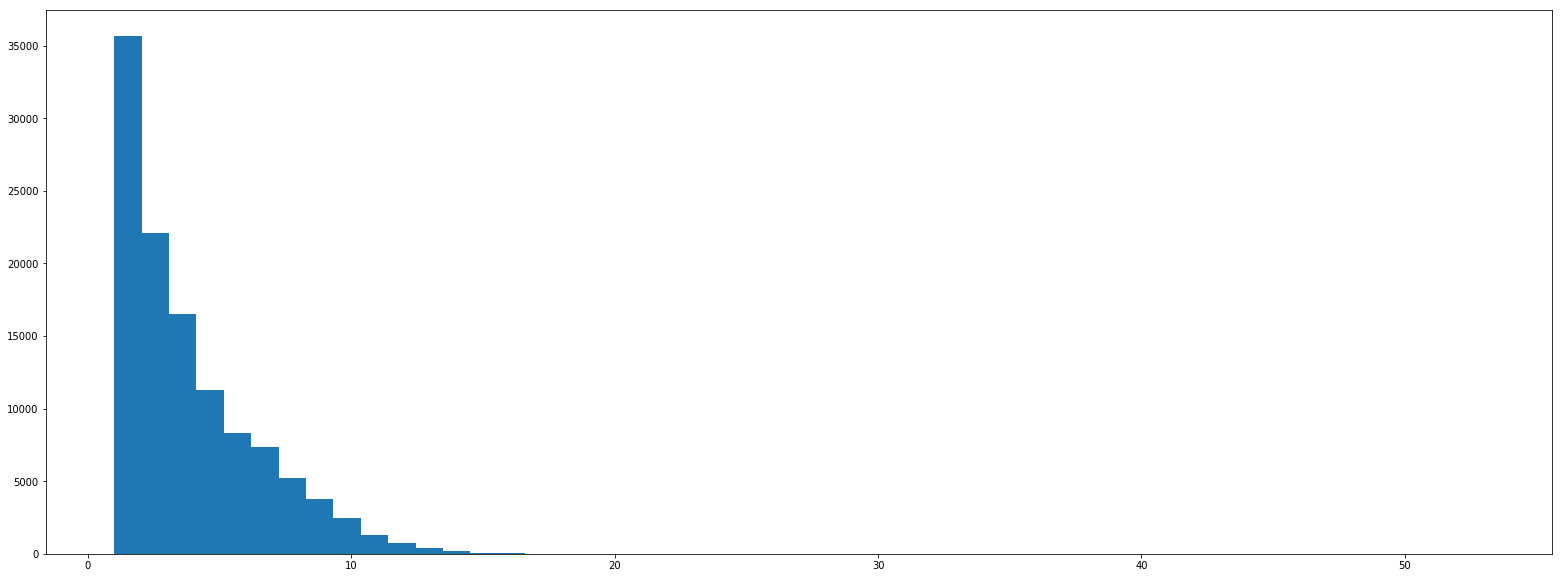

In [365]:
plt.figure(figsize=(27,10))
plt.hist(df_targ['len'], bins = 50);

In [366]:
df_test =  pd.DataFrame(test, columns = ['labels','file', 'len'])
df_train =  pd.DataFrame(train, columns = ['labels','file', 'len'])
df_val =  pd.DataFrame(val, columns = ['labels','file', 'len'])


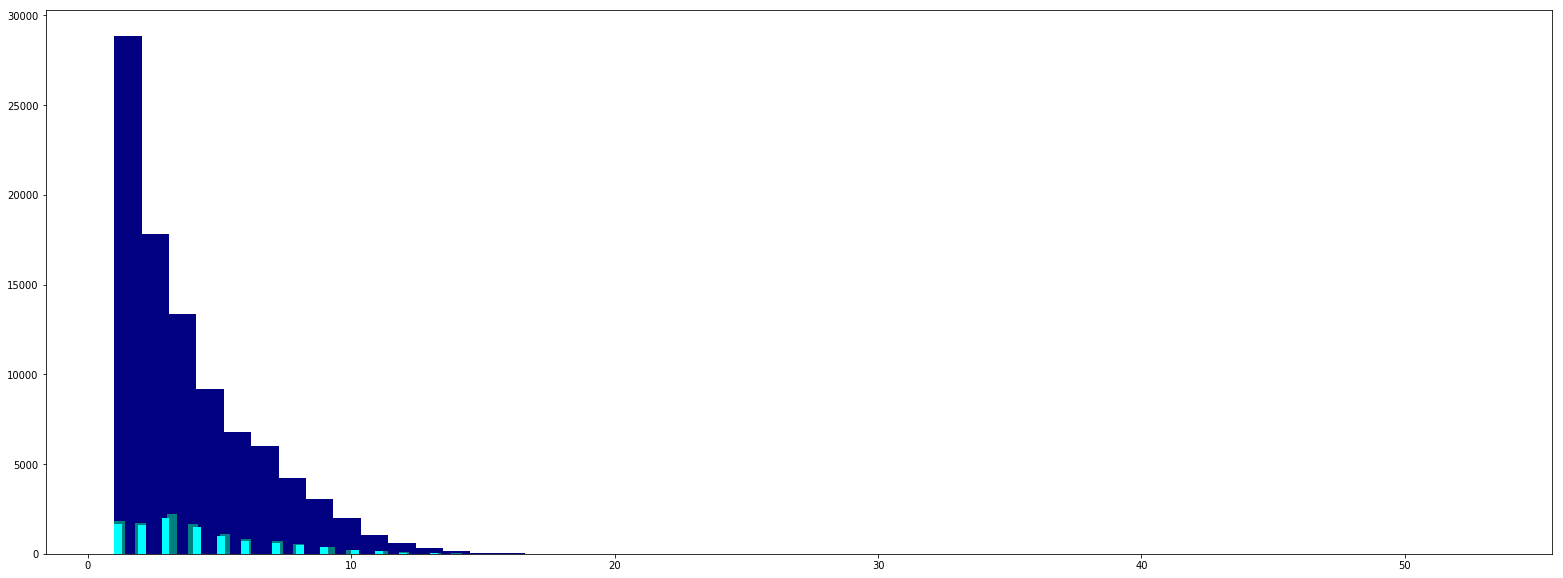

In [368]:
plt.figure(figsize=(27,10))
plt.hist(df_train['len'], color = 'navy', label = 'Training Dataset', bins = 50)
plt.hist(df_test['len'], color = 'teal', label = 'Testing Dataset', bins = 50)
plt.hist(df_val['len'], color = 'aqua', label = 'Validation Dataset', bins = 50);


In [136]:
hs = open('data/clean.txt', 'a')
counter = 0
err_counter = 0
l = ""
with open('data/words_202.txt') as f:
    for line in f:
        if ' err ' in line:
            err_counter += 1
        else:
            counter += 1
            hs.write(line)
            l += line

In [137]:
counter

96456

In [138]:
err_counter

18662

In [139]:
hs.close()